In [8]:
import glob
import pandas as pd

csv_files = glob.glob('data/timings/*.csv')
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

print(dfs[0])

                       Scene                     Action        Time
0                      Login             login the user    5.929509
1                    Welcome           welcome the user   16.582690
2  Tasks Menu Intro Tutorial              intro message    6.562340
3        Tasks Menu Tutorial  choose a manteinance task   30.105700
4  Place Door Intro Tutorial              intro message   35.384310
5        Place Door Tutorial                 place door   83.929560
6        Steps Menu Tutorial             navigate steps   25.423300
7       Tasks Menu Challenge  choose a manteinance task   16.316250
8       Place Door Challenge             place the door   62.473980
9       Steps Menu Challenge             navigate steps  203.316900


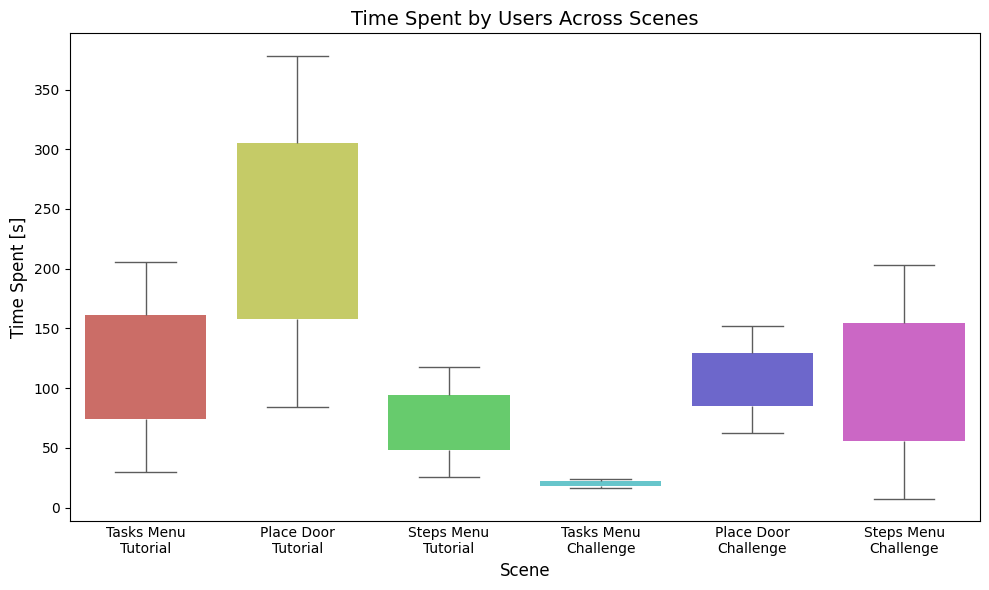

In [41]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


folder_path = 'data/timings'
combined_data = pd.DataFrame()
keep_scenes = ['Tasks Menu Tutorial', 'Place Door Tutorial', 'Steps Menu Tutorial',
               'Tasks Menu Challenge', 'Place Door Challenge', 'Steps Menu Challenge']

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        tmp_df = pd.read_csv(file_path)
        combined_data = pd.concat([combined_data, tmp_df], ignore_index=True)

# Filter to keep only specific scenes of interest
combined_data = combined_data[combined_data['Scene'].isin(keep_scenes)]

plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

box_plot = sns.boxplot(x="Scene", y="Time", data=combined_data, hue="Scene", 
            palette=palette, dodge=False, legend=False, boxprops={'linewidth': 0},
            medianprops={'linewidth': 0}) 

plt.xticks(ticks=range(len(combined_data['Scene'].unique())),
           labels=['Tasks Menu\nTutorial', 'Place Door\nTutorial', 'Steps Menu\nTutorial',
               'Tasks Menu\nChallenge', 'Place Door\nChallenge', 'Steps Menu\nChallenge'],
           rotation=0)

plt.tick_params(axis='x', which='both', length=0)

#plt.xticks(rotation=45, ha="right")
plt.xlabel("Scene", fontsize=12)
plt.ylabel("Time Spent [s]", fontsize=12)
plt.title("Time Spent by Users Across Scenes", fontsize=14)
plt.tight_layout()
plt.show()



- Experienced hololens users against novel users to see user frendliness
- Overall times for novel users to see bottlenecks